# PSO Implementation and Results Comparison between My PSO and PySwarms

* In this notebook, the results of My PSO and PySwarms are compared for different optimization functions (Rosenbrock, Ackley and Rastrigin).
* For each function, the best parameter configurations are analyzed and the final costs and execution times are compared.
* Convergence plots are generated and stability statistics are analyzed.
* Box plots are generated to visualize the distribution of costs and execution times.
* Scatter plots are generated to compare the final cost and execution time between both methods.


In [1]:
# Importing libraries
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import ast
%matplotlib inline
import re

# Load the CSV results file
df = pd.read_csv('../analysis/results.csv')
print("Columns in results.csv:", df.columns)
print(df.head())

functions = ['ackley', 'rastrigin', 'rosenbrock']


# Check if the expected columns are present
expected_columns = ['method', 'function', 'n_particles', 'iters', 'w', 'c1', 'c2', 'dim', 'cost', 'execution_time', 'cost_history']
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"Error: The following columns are not in results.csv: {missing_columns}")
    print("Please, check pso_script.py is creating results.csv correctly.")
    raise KeyError(f"Missing columns: {missing_columns}")


# Find the best configurations for each function
for func in functions:
    func_df = df[df['function'] == func]
    best_results = func_df.sort_values(by='cost').head(5)
    print(f"\nTop 5 configurations for {func}:")
    print(best_results[['method', 'n_particles', 'iters', 'w', 'c1', 'c2', 'dim', 'cost', 'execution_time']])

# Convert cost_history strings to lists of floats
def extract_floats(x):
    if isinstance(x, str):
        try:
            # Replace "np.float64" and extract the float values
            x_cleaned = re.sub(r'np\.float64\((.*?)\)', r'\1', x)
            return [float(val) for val in ast.literal_eval(x_cleaned)]
        except (ValueError, SyntaxError) as e:
            # Handle the case where conversion fails
            print(f"Error at converting cost_history: {e}, value: {x}")
            return []
    return x if isinstance(x, list) else []

df['cost_history'] = df['cost_history'].apply(extract_floats)

# Check results
print(type(df.loc[0, 'cost_history']))
print(df.loc[0, 'cost_history'][:5])


Columns in results.csv: Index(['method', 'function', 'n_particles', 'iters', 'w', 'c1', 'c2', 'dim',
       'cost', 'position', 'execution_time', 'cost_history', 'repetition'],
      dtype='object')
         method    function  n_particles  iters    w   c1   c2  dim      cost  \
0        my_pso      ackley           10    100  0.5  1.0  0.5    2  0.010973   
1  pyswarms_pso      ackley           10    100  0.5  1.0  0.5    2  0.000044   
2        my_pso  rosenbrock           10    100  0.5  1.0  0.5    2  0.000027   
3  pyswarms_pso  rosenbrock           10    100  0.5  1.0  0.5    2  0.059819   
4        my_pso   rastrigin           10    100  0.5  1.0  0.5    2  0.040421   

                                            position  execution_time  \
0    [0.0033917072220950263, -0.0015936472891626098]        0.028625   
1  [1.5652050238828046e-05, -1.5579881538279108e-06]        0.014481   
2           [1.0052051250591794, 1.0104399855359225]        0.023761   
3           [1.24457914640

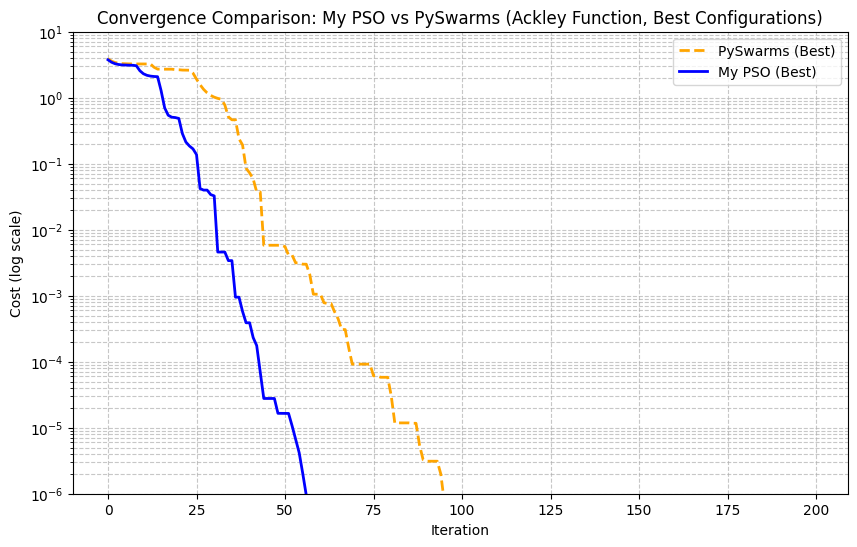

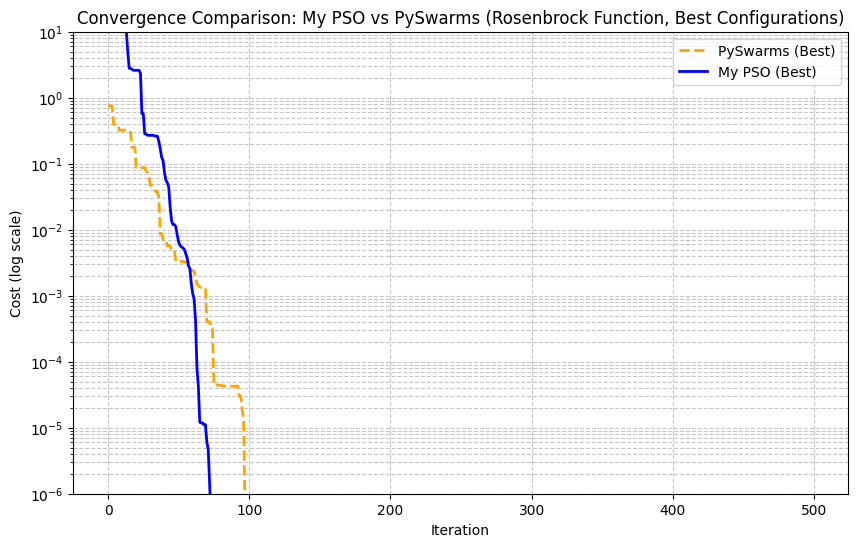

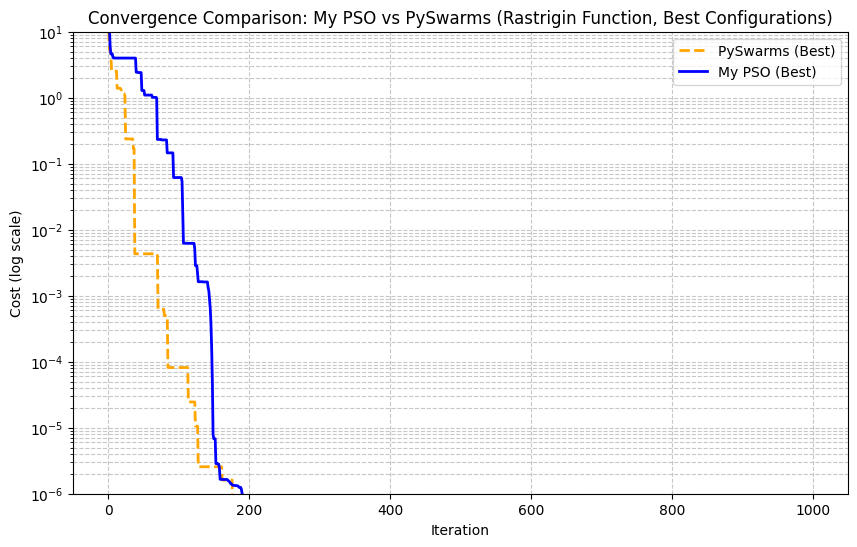

In [2]:
# Plotting convergence comparison for the best configurations
# Obtaining function names
functions = list(df['function'].value_counts().index)
for func in functions:
    # Filter the DataFrame for the current function and get the best configurations
    func_df = df[df['function'] == func]
    best_my_pso = func_df[func_df['method'] == 'my_pso'].sort_values(by='cost').iloc[0]
    best_pyswarms = func_df[func_df['method'] == 'pyswarms_pso'].sort_values(by='cost').iloc[0]

    # Set the cost history for both methods
    min_length = min(len(best_my_pso['cost_history']), len(best_pyswarms['cost_history']))
    my_pso_history = best_my_pso['cost_history'][:min_length]
    pyswarms_history = best_pyswarms['cost_history'][:min_length]

    # Plotting the convergence comparison
    plt.figure(figsize=(10, 6))
    plt.plot(pyswarms_history, label='PySwarms (Best)', linestyle='--', color='orange', linewidth=2)
    plt.plot(my_pso_history, label='My PSO (Best)', linestyle='-', color='blue', linewidth=2)

    plt.yscale('log')
    plt.ylim(1e-6, 10)
    plt.xlabel('Iteration')
    plt.ylabel('Cost (log scale)')
    plt.title(f'Convergence Comparison: My PSO vs PySwarms ({func.capitalize()} Function, Best Configurations)')
    plt.grid(True, which="both", linestyle="--", alpha=0.7)
    plt.legend()
    plt.show()

In [3]:
for func in functions:
    # Filter the DataFrame for the current function and get the best configurations
    func_df = df[df['function'] == func]
    best_my_pso = func_df[func_df['method'] == 'my_pso'].sort_values(by='cost').iloc[0]
    best_pyswarms = func_df[func_df['method'] == 'pyswarms_pso'].sort_values(by='cost').iloc[0]

    # Print the best configurations
    print("-" * 50)
    print()
    print(f"Analysis {func.capitalize()} function results:")
    print(f"My PSO converges with a cost of {best_my_pso['cost']} in {best_my_pso['execution_time']} seconds.")
    print(f"PySwarms PSO converges with a cost of {best_pyswarms['cost']} in {best_pyswarms['execution_time']} seconds.")
    print("\n* Conclusions:")
    if best_my_pso['cost'] < best_pyswarms['cost']:
        print(f"-> My PSO is {best_pyswarms['cost'] - best_my_pso['cost']} units cheaper than PySwarms' PSO.")
    else:
        print(f"-> PySwarms' PSO is {best_my_pso['cost'] - best_pyswarms['cost']} units cheaper than My PSO.")
    if best_my_pso['execution_time'] < best_pyswarms['execution_time']:
        print(f"-> My PSO is faster than PySwarms' PSO by {best_pyswarms['execution_time'] - best_my_pso['execution_time']} seconds.")
    else:
        print(f"-> PySwarms' PSO is faster than My PSO by {best_my_pso['execution_time'] - best_pyswarms['execution_time']} seconds.")
    print()
    print("-" * 50)
    print()

--------------------------------------------------

Analysis Ackley function results:
My PSO converges with a cost of 4.440892098500626e-16 in 0.2508420944213867 seconds.
PySwarms PSO converges with a cost of 4.440892098500626e-16 in 0.1661818027496338 seconds.

* Conclusions:
-> PySwarms' PSO is 0.0 units cheaper than My PSO.
-> PySwarms' PSO is faster than My PSO by 0.08466029167175293 seconds.

--------------------------------------------------

--------------------------------------------------

Analysis Rosenbrock function results:
My PSO converges with a cost of 0.0 in 0.3759660720825195 seconds.
PySwarms PSO converges with a cost of 0.0 in 0.1393887996673584 seconds.

* Conclusions:
-> PySwarms' PSO is 0.0 units cheaper than My PSO.
-> PySwarms' PSO is faster than My PSO by 0.23657727241516108 seconds.

--------------------------------------------------

--------------------------------------------------

Analysis Rastrigin function results:
My PSO converges with a cost of 0.0 i

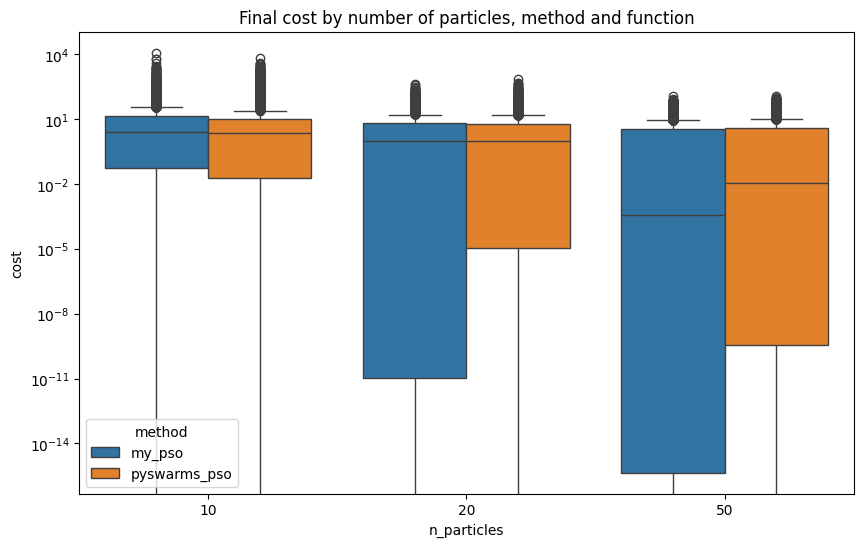

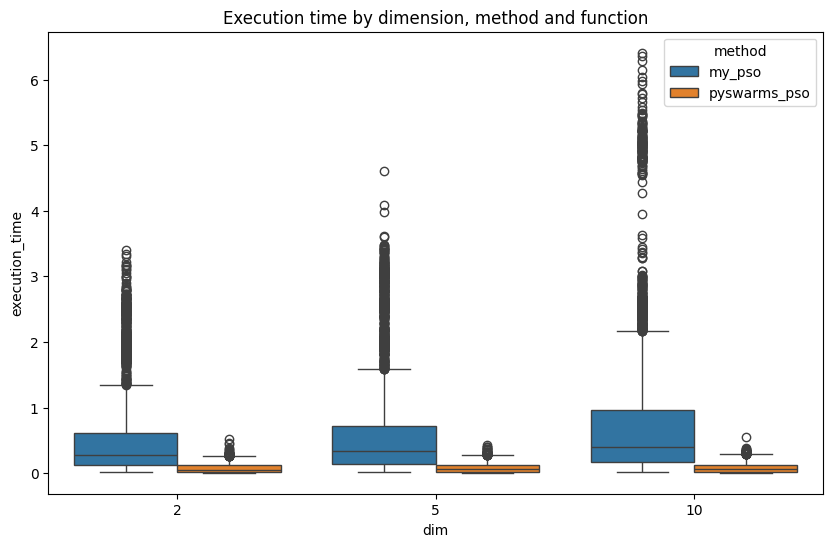

In [4]:
import seaborn as sns
# Boxplot for cost and execution time of the different methods (My PSO and PySwarms)
plt.figure(figsize=(10, 6))
sns.boxplot(x='n_particles', y='cost', hue='method', data=df)
plt.yscale('log')
plt.title('Final cost by number of particles, method and function')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='dim', y='execution_time', hue='method', data=df)
plt.title('Execution time by dimension, method and function')
plt.show()


Statistics for ackley:
My PSO - Cost Mean: 0.6492771281744625
My PSO - Cost Std: 1.0601719168604675
PySwarms - Cost Mean: 0.6286226737917507
PySwarms - Cost Std: 1.0274535129316853

Statistics for rosenbrock:
My PSO - Cost Mean: 38.7114269836555
My PSO - Cost Std: 259.92196843128374
PySwarms - Cost Mean: 42.48066328469759
PySwarms - Cost Std: 222.3983608507716

Statistics for rastrigin:
My PSO - Cost Mean: 9.909892244305226
My PSO - Cost Std: 13.680291240948725
PySwarms - Cost Mean: 9.43780782579505
PySwarms - Cost Std: 12.767763643219785


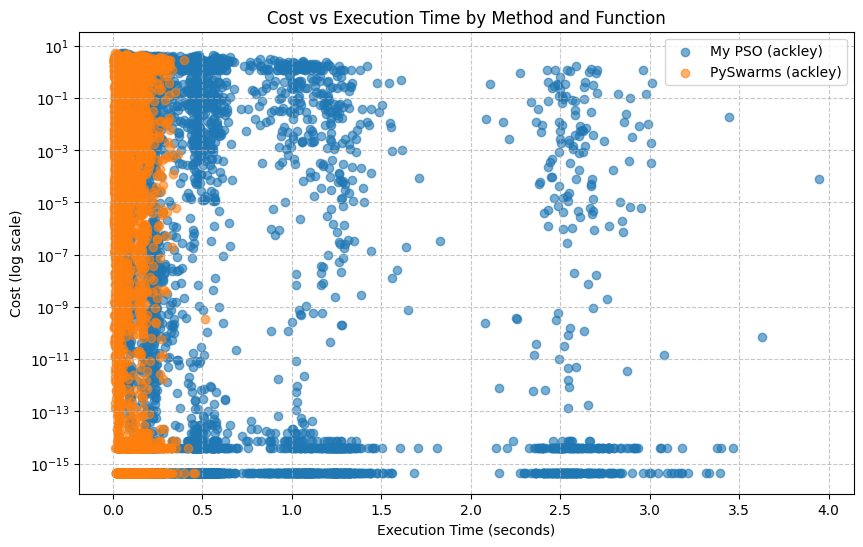

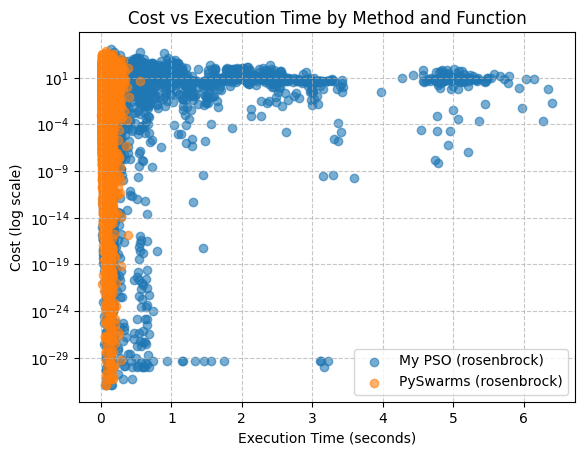

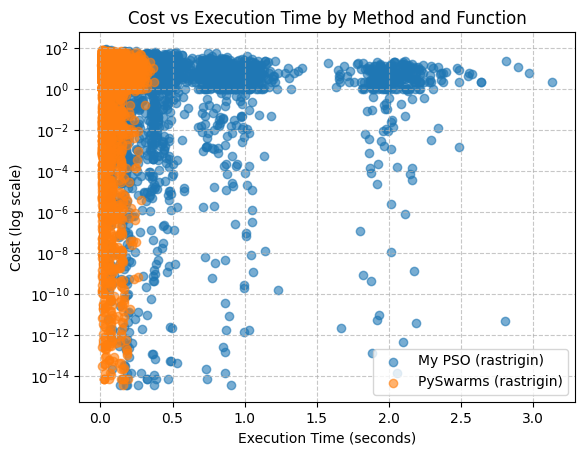

In [5]:

# Group by function and method to get the mean and std of cost and execution time
for func in functions:
    func_df = df[df['function'] == func]
    print(f"\nStatistics for {func}:")
    print("My PSO - Cost Mean:", func_df[func_df['method'] == 'my_pso']['cost'].mean())
    print("My PSO - Cost Std:", func_df[func_df['method'] == 'my_pso']['cost'].std())
    print("PySwarms - Cost Mean:", func_df[func_df['method'] == 'pyswarms_pso']['cost'].mean())
    print("PySwarms - Cost Std:", func_df[func_df['method'] == 'pyswarms_pso']['cost'].std())

# Scatter plot for cost vs execution time
plt.figure(figsize=(10, 6))
for func in functions:
    func_df = df[df['function'] == func]
    plt.scatter(
        func_df[func_df['method'] == 'my_pso']['execution_time'],
        func_df[func_df['method'] == 'my_pso']['cost'],
        label=f'My PSO ({func})', alpha=0.6
    )
    plt.scatter(
        func_df[func_df['method'] == 'pyswarms_pso']['execution_time'],
        func_df[func_df['method'] == 'pyswarms_pso']['cost'],
        label=f'PySwarms ({func})', alpha=0.6
    )

    plt.yscale('log')
    plt.xlabel('Execution Time (seconds)')
    plt.ylabel('Cost (log scale)')
    plt.title('Cost vs Execution Time by Method and Function')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.7)
    plt.show()